In [3]:
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.sparse

#preprocessing and scoring
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score,precision_score

#models and algos
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression

#customer pipeline function
from sklearn.base import BaseEstimator, TransformerMixin

#feature extraction 
from sklearn.feature_extraction.text import TfidfVectorizer

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

In [4]:
from zipfile import ZipFile
with ZipFile("./exam/twitter_training.CSV.zip",'r') as f:
    f.extractall("./")  

In [5]:
df=pd.read_csv("twitter_training.CSV",encoding='latin-1')
df.head(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
df.columns=["id","user","polarity","tweet"]

In [7]:
df.shape

(74681, 4)

In [8]:
df.user.value_counts()

user
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400

These people are influencers.

In [9]:
df.head(2)

,id,user,polarity,tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...


In [10]:
df.polarity.value_counts()

polarity
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

In [11]:
df.user.value_counts()

user
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)          

In [12]:
df.isnull().sum()

id            0
user          0
polarity      0
tweet       686
dtype: int64

In [13]:
df=df.dropna()

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
#Remove stopwords
def stopword_remover(sentences, stopwords):
    clean = []
    for i in sentences:
        sentence = word_tokenize(i)
        clean_sentence = [word for word in sentence if word.lower() not in stopwords]
        clean_sentence = " ".join(clean_sentence)
        clean.append(clean_sentence)
    return clean

In [16]:
import nltk
from nltk.stem import PorterStemmer

def stemmer_words(sentences, stemmer):
    stem = []
    for i in sentences:
        stem_words = [stemmer.stem(word) for word in i.split()]
        stem_words = " ".join(stem_words)
        stem.append(stem_words)
    return stem

df_a = pd.DataFrame(stemmer_words(df['tweet'], PorterStemmer()))

In [17]:
df["tweet"]=df_a[0]

In [18]:
df["tweet"]

0         i am come to the border and i will kill you all,
1            im get on borderland and i will kill you all,
2         im come on borderland and i will murder you all,
3        im get on borderland 2 and i will murder you m...
4         im get into borderland and i can murder you all,
                               ...                        
74676                                                  NaN
74677                                                  NaN
74678                                                  NaN
74679                                                  NaN
74680                                                  NaN
Name: tweet, Length: 73995, dtype: object

In [19]:
def clean_text(text):  
    pat1 = r'@[^ ]+'                   #@signs and value
    pat2 = r'https?://[A-Za-z0-9./]+'  #links
    pat3 = r'\'s'                      #floating s's
    pat4 = r'\#\w+'                     # hashtags and value
    pat5 = r'&amp '
    pat6 = r'[^A-Za-z\s]'         #remove non-alphabet
    combined_pat = r'|'.join((pat1, pat2,pat3,pat4,pat5, pat6))
    text = re.sub(combined_pat,"",text).lower()
    return text.strip()


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        73995 non-null  int64 
 1   user      73995 non-null  object
 2   polarity  73995 non-null  object
 3   tweet     73312 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [21]:
df.tweet=df.tweet.astype(str)

In [22]:
df["tweet"].apply(clean_text)

0          i am come to the border and i will kill you all
1             im get on borderland and i will kill you all
2          im come on borderland and i will murder you all
3        im get on borderland  and i will murder you me...
4          im get into borderland and i can murder you all
                               ...                        
74676                                                  nan
74677                                                  nan
74678                                                  nan
74679                                                  nan
74680                                                  nan
Name: tweet, Length: 73995, dtype: object

In [23]:
df["polarity"].value_counts()

polarity
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["polarity"]=le.fit_transform(df["polarity"])


### polarity
### Negative      22358 as 1
### Positive      20654 as 3
### Neutral       18108 as 2
### Irrelevant    12875 as 0

In [23]:
# df["user"]=le.fit_transform(df["user"])

In [25]:
df.head(2)

,id,user,polarity,tweet
0,2401,Borderlands,3,"i am come to the border and i will kill you all,"
1,2401,Borderlands,3,"im get on borderland and i will kill you all,"


In [26]:
df=df.dropna()
df.isnull().sum()

id          0
user        0
polarity    0
tweet       0
dtype: int64

In [27]:
df.shape

(73995, 4)

#Lemmetization

In [28]:
lem=WordNetLemmatizer()

def tokenize_lem(sentence):
    outlist=[]
    token=sentence.split()
    for tok in token:
        outlist.append(lem.lemmatize(tok))
    return " ".join(outlist)
    

In [29]:
import nltk
df["tweet"]=df["tweet"].apply(tokenize_lem)
df.head(2)

,id,user,polarity,tweet
0,2401,Borderlands,3,"i am come to the border and i will kill you all,"
1,2401,Borderlands,3,"im get on borderland and i will kill you all,"


In [30]:
df.polarity.value_counts()

polarity
1    22358
3    20654
2    18108
0    12875
Name: count, dtype: int64

In [31]:
df.shape

(73995, 4)

<Axes: xlabel='polarity', ylabel='count'>

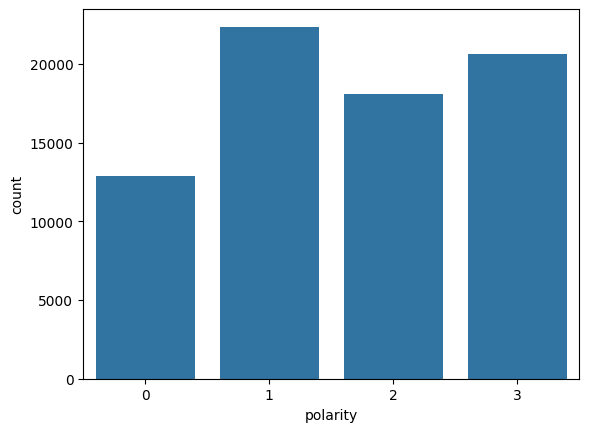

In [32]:
sns.countplot(data=df,x='polarity')

In [80]:
df["tweet"]=df["tweet"].astype(str)
df["length"]=df["tweet"].apply(len)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73312 entries, 0 to 73994
Columns: 105 entries, id to your
dtypes: float64(100), int32(1), int64(2), object(2)
memory usage: 59.0+ MB


In [81]:
df1=df.copy() #making some copy
df1.to_csv("cleaned2.csv")


TF-IDF

vectorise the tweets


In [82]:
vectorizer=TfidfVectorizer(max_features=100)
tfidf_matrix=vectorizer.fit_transform(df["tweet"])
vocab=vectorizer.get_feature_names_out()
tfidf_df=pd.DataFrame(tfidf_matrix.toarray(),columns=vocab)

In [83]:
tfidf_df.head()

,about,all,amazon,an,and,are,at,ban,be,becaus,...,when,whi,who,will,with,work,xbox,year,you,your
0,0.0,0.489452,0.0,0.0,0.315409,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.570958,0.0,0.0,0.0,0.0,0.413126,0.0
1,0.0,0.437763,0.0,0.0,0.282100,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.510662,0.0,0.0,0.0,0.0,0.369498,0.0
2,0.0,0.490160,0.0,0.0,0.315865,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.571784,0.0,0.0,0.0,0.0,0.413724,0.0
3,0.0,0.402834,0.0,0.0,0.259591,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.469916,0.0,0.0,0.0,0.0,0.340015,0.0
4,0.0,0.484146,0.0,0.0,0.311989,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.408647,0.0


In [84]:
tweets=df["tweet"]
# df=df.drop(["tweet","id"],axis=1)


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73312 entries, 0 to 73994
Columns: 105 entries, id to your
dtypes: float64(100), int32(1), int64(2), object(2)
memory usage: 59.0+ MB


In [86]:
df=pd.merge(df,tfidf_df,left_index=True,right_index=True)
df.head()

,id,user,polarity,tweet,length,about_x,all_x,amazon_x,an_x,and_x,...,when_y,whi_y,who_y,will_y,with_y,work_y,xbox_y,year_y,you_y,your_y
0,2401,Borderlands,3,"i am come to the border and i will kill you all,",48,0.0,0.489255,0.0,0.0,0.315732,...,0.0,0.0,0.0,0.570958,0.0,0.0,0.0,0.0,0.413126,0.0
1,2401,Borderlands,3,"im get on borderland and i will kill you all,",45,0.0,0.437701,0.0,0.0,0.282463,...,0.0,0.0,0.0,0.510662,0.0,0.0,0.0,0.0,0.369498,0.0
2,2401,Borderlands,3,"im come on borderland and i will murder you all,",48,0.0,0.490064,0.0,0.0,0.316254,...,0.0,0.0,0.0,0.571784,0.0,0.0,0.0,0.0,0.413724,0.0
3,2401,Borderlands,3,im get on borderland 2 and i will murder you m...,52,0.0,0.402781,0.0,0.0,0.259928,...,0.0,0.0,0.0,0.469916,0.0,0.0,0.0,0.0,0.340015,0.0
4,2401,Borderlands,3,"im get into borderland and i can murder you all,",48,0.0,0.484060,0.0,0.0,0.312380,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.408647,0.0


In [87]:
# from sklearn.preprocessing import StandardScaler
# st=StandardScaler()
# df["length"]=st.fit_transform(df[["length"]])

In [88]:
df.head(2)

,id,user,polarity,tweet,length,about_x,all_x,amazon_x,an_x,and_x,...,when_y,whi_y,who_y,will_y,with_y,work_y,xbox_y,year_y,you_y,your_y
0,2401,Borderlands,3,"i am come to the border and i will kill you all,",48,0.0,0.489255,0.0,0.0,0.315732,...,0.0,0.0,0.0,0.570958,0.0,0.0,0.0,0.0,0.413126,0.0
1,2401,Borderlands,3,"im get on borderland and i will kill you all,",45,0.0,0.437701,0.0,0.0,0.282463,...,0.0,0.0,0.0,0.510662,0.0,0.0,0.0,0.0,0.369498,0.0


In [89]:
# X=df.drop(["id","polarity","user","tweet","length"],axis=1)
X=df.drop(["polarity","user","tweet"],axis=1)
y=df.polarity

In [90]:
X.head()

,id,length,about_x,all_x,amazon_x,an_x,and_x,are_x,at_x,ban_x,...,when_y,whi_y,who_y,will_y,with_y,work_y,xbox_y,year_y,you_y,your_y
0,2401,48,0.0,0.489255,0.0,0.0,0.315732,0.0,0.0,0.0,...,0.0,0.0,0.0,0.570958,0.0,0.0,0.0,0.0,0.413126,0.0
1,2401,45,0.0,0.437701,0.0,0.0,0.282463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.510662,0.0,0.0,0.0,0.0,0.369498,0.0
2,2401,48,0.0,0.490064,0.0,0.0,0.316254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.571784,0.0,0.0,0.0,0.0,0.413724,0.0
3,2401,52,0.0,0.402781,0.0,0.0,0.259928,0.0,0.0,0.0,...,0.0,0.0,0.0,0.469916,0.0,0.0,0.0,0.0,0.340015,0.0
4,2401,48,0.0,0.484060,0.0,0.0,0.312380,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.408647,0.0


In [91]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72641 entries, 0 to 73311
Columns: 202 entries, id to your_y
dtypes: float64(200), int64(2)
memory usage: 112.5 MB


In [92]:
y.info()

<class 'pandas.core.series.Series'>
Index: 72641 entries, 0 to 73311
Series name: polarity
Non-Null Count  Dtype
--------------  -----
72641 non-null  int32
dtypes: int32(1)
memory usage: 851.3 KB


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [94]:
best_param = {'n_estimators':500, 'max_depth': 20} # , 'learning_rate': 0.2597301243475285, 'colsample_bytree': 0.9737809255659772, 'subsample': 0.8612667982194789, 'min_child_weight': 1}
import xgboost as xgb
model = xgb.XGBClassifier(
            **best_param,
            eval_metric="logloss",
            random_state=1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
with open("XGBoostmodel.pkl","wb") as f:
    pickle.dump(model,f)
print("accuracy :" ,acc)

accuracy : 0.643358568479009


In [95]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      1310
           1       0.66      0.69      0.67      2187
           2       0.65      0.65      0.65      1770
           3       0.63      0.65      0.64      1998

    accuracy                           0.64      7265
   macro avg       0.64      0.63      0.64      7265
weighted avg       0.64      0.64      0.64      7265



In [57]:
# from sklearn.svm import SVC
# lnSVC_params = {
#     "C": [1,3]
# } 
# model=SVC()
# model = GridSearchCV(model, param_grid=lnSVC_params, cv= 5)    
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# print("test score: ",accuracy_score(y_test,y_pred))
# print("\n")
# print("Test Report:")
# print(classification_report(y_test,y_pred))

# import pickle
# with open("SVCmodel.pkl","wb") as f:
#     pickle.dump(model,f)

## Word Cloud

In [96]:
import spacy

In [97]:
#loading the model
nlp=spacy.load("en_core_web_sm")

In [98]:
#combining tweets into a single string
combined_tweets=' '.join(tweets[:1000].values)

In [99]:
#creating doc object
doc=nlp(combined_tweets)

In [100]:
# #Importing libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [101]:
# Function for generating word frequency
def gen_freq(tokens):

    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()

    # Printing frequencies
    print(word_freq[:20])

    return word_freq

In [102]:
# Getting word frequency
word_freq=gen_freq(doc)

.             1129
i              729
the            694
borderland     561
!              546
a              489
to             470
and            467
,              433
is             300
3              278
it             264
of             262
for            250
my             231
thi            219
...            212
you            204
on             201
in             198
Name: count, dtype: int64


In [103]:
#number of unique words
len(word_freq)

2144

In [104]:
# Function for generating wordcloud
def genrate_wordcloud(data):
    text=" ".join(data.index)
      # Creating a wordcloud
    wc=WordCloud(width=400,height=300,max_words=200,background_color="white").generate(text)  

    plt.figure(figsize=(14,12))

    #display wordcloud as image
    plt.imshow(wc,interpolation="bilinear")

   #removing axes
    plt.axis("off")
    
    plt.show()

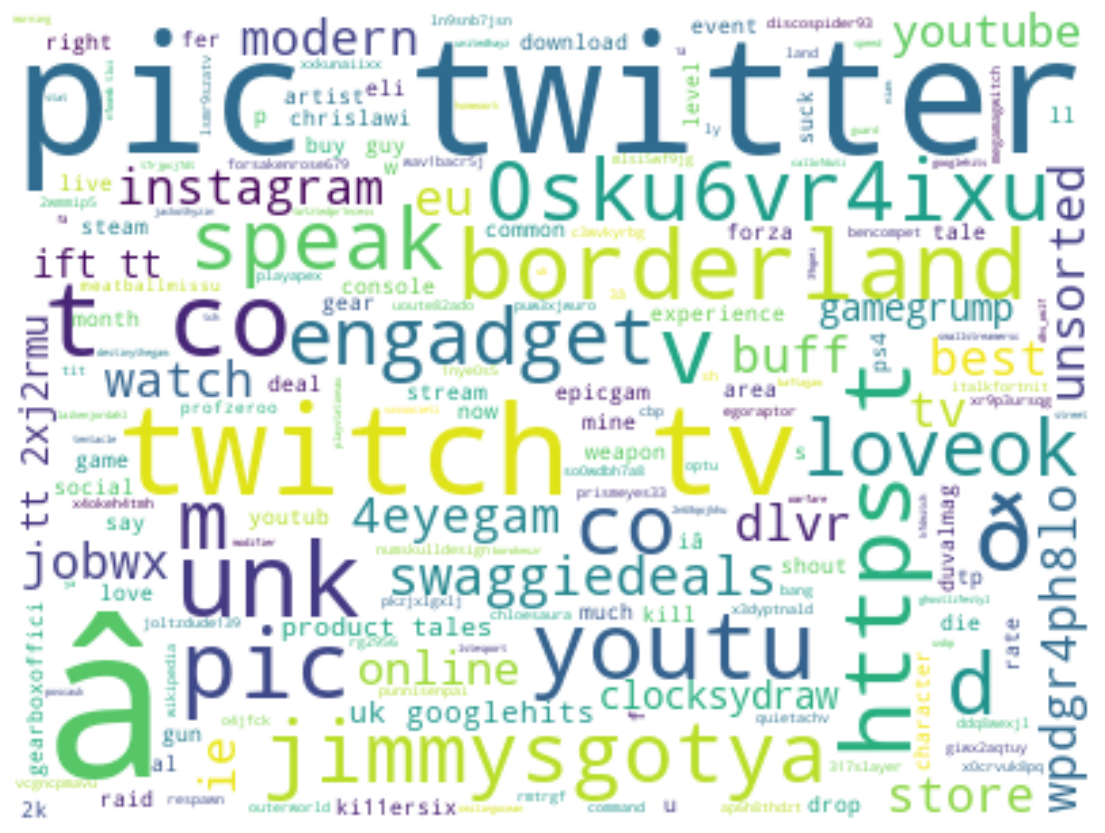

In [105]:
# Generating wordcloud
genrate_wordcloud(word_freq)    

In [106]:
import pickle
with open("XGBoostmodel.pkl","rb") as f:
    model_test=pickle.load(f)

In [107]:
# y_pred = model.predict(X_test)
# acc = accuracy_score(y_test, y_pred)
model_test.score(X_test,y_test)

0.643358568479009